# Plot AFAPE results (convergence plot) 
Plot the results for one agent, but as a function of the number of datapoints (convergence plot) 

In [1]:
%load_ext autoreload
%autoreload 2

## Define paths

In [2]:
# which dataset to work on 
dataset_name   = "synthetic_1"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# name for agent 
agent_name  = 'DQN'

# included estimators
included_estimator_types =  ['blocking', 'ground_truth']

In [3]:
# other specifications 
data_dir       = "../../../data/ts/" + dataset_name + "/" + miss_scenario + "/" 
agent_dir = data_dir + 'afa_agents' + '/' + agent_name + '/'

# find all bootstrap results files
agent_bootstrap_files = {}
for included_estimator_type in included_estimator_types:
    agent_bootstrap_files[included_estimator_type] = agent_dir + included_estimator_type + '_' + 'J_bootstraps_convergence.hkl'

## Load results

In [4]:
from afa.afa_models.afa_estimators.utils import load_results_bootstrapping

In [5]:
J_bootstraps = {}
for included_estimator_type in included_estimator_types:
    # load bootstrap results for estimator_type
    bootstrap_file = agent_bootstrap_files[included_estimator_type]

    J_bootstraps_added, convergence_steps  = load_results_bootstrapping( bootstrap_file )

    # merge
    J_bootstraps = {**J_bootstraps, **J_bootstraps_added}

## Compute Ground truth 

In [6]:
J_gt = J_bootstraps['Ground_truth'][-1,:].mean() 
print("Ground truth E[C|do(R_bar = 1)] = {}".format(J_gt)) 

Ground truth E[C|do(R_bar = 1)] = 2.7191183841957836


## Plot results

In [7]:
from afa.afa_models.afa_estimators.visualization.plot_convergence_results import plot_convergence_results

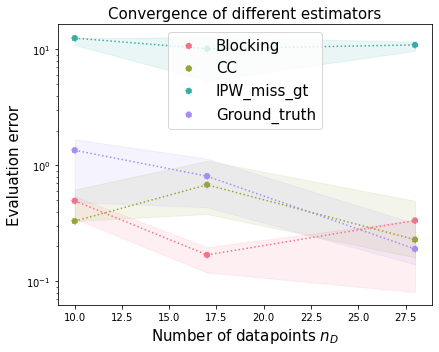

In [8]:
plot_convergence_results( J_bootstraps, convergence_steps , J_gt = J_gt,   title = None)